# Linear Regression

Linear Regression is one of the most common and elementary predictive methods in the arsenal of a (computational) social scientist or data scientist.
We should consider using this method if we want to be able to 
predict continuous output based on a continuous independent variable, and if we 
have good reason to believe the relationship between the two continuous variables is linear (i.e. as the value of x increases, y increases or decreases proportionally). 

There are two types of linear regression:

* Simple Linear Regression
* Multiple Linear Regression

Both can be implemented using the Python library scikit-learn.
We will practice using the relevant scikit-learn class on a dataset that contains returns of Istanbul Stock Exchange. 


In [20]:
import pandas as pd

# pandas allows reading of .csv files from a url
istanbul_stock_exchange = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx', header=1)

# The target variable is given based on USD (ISE.1) and Turkish lira (ISE). 
# We keep only one. 
istanbul_stock_exchange = istanbul_stock_exchange.drop('ISE.1', axis=1)
print(istanbul_stock_exchange.head())

        date       ISE        SP  ...   BOVESPA        EU        EM
0 2009-01-05  0.035754 -0.004679  ...  0.031190  0.012698  0.028524
1 2009-01-06  0.025426  0.007787  ...  0.018920  0.011341  0.008773
2 2009-01-07 -0.028862 -0.030469  ... -0.035899 -0.017073 -0.020015
3 2009-01-08 -0.062208  0.003391  ...  0.028283 -0.005561 -0.019424
4 2009-01-09  0.009860 -0.021533  ... -0.009764 -0.010989 -0.007802

[5 rows x 9 columns]


## Simple Linear Regression

Simple Linear Regression involves predicting output using only one independent variable. 

The formula for simple linear regression is:

$$y = \alpha + \beta x$$

We want to determine the value for the model parameters $\alpha$ and $\beta$ based on our data.
The value for $\beta$ is our _regression coefficients_, which specifies the relationship between the independent variable $x$ and the outcome variable $y$.

Let's say we suspect that some other stock indexes are better predictors of the Istanbul returns than others, and we want to model the relationship of the ISE values with the stock exchange that is the most closely related to it.
We can find out which independent variable is likely to be a good predictor by 
looking at the correlations between the variables. 

In [21]:
# pandas corr() function tells us the 
# correlations between all variables in the data
all_corr = istanbul_stock_exchange.corr()
corr_with_ise = all_corr['ISE']

# we're curious which variables correlate most strongly, 
# irrespective of the direction of the relationship.
corr_with_ise = corr_with_ise.apply(abs)
sorted_corr = corr_with_ise.sort_values()
print(sorted_corr)

NIKKEI     0.260052
BOVESPA    0.432898
SP         0.439489
EM         0.600295
DAX        0.602081
FTSE       0.622948
EU         0.655519
ISE        1.000000
Name: ISE, dtype: float64


It turns out EM, which is the MSCI Emerging Markets Index, correlates most strongly with our target variable.
Let's look more closely at the relationship between EM and ISE.

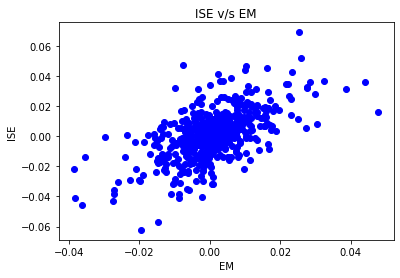

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# select the desired variables
x = istanbul_stock_exchange['EM']
y = istanbul_stock_exchange['ISE']

# plot the data
plt.scatter(x, y, color='b')
plt.title('ISE v/s EM')
plt.xlabel('EM')
plt.ylabel('ISE')
plt.show()

We can see a pattern in the scatter plot where higher values of X correspond to higher values of Y. 
This is a linear relationship, and so can reasonably try to model it with linear regression.
Note that if the scatter plot showed a different pattern, we would be advised to consider other, perhaps non-linear methods.

Lets fit our model. Fitting a Linear Regression model is achieved by minimising the _residual sum of squares_. The residual sum of squares described how far away the data is, on average, from the predictions the model makes. 


In [23]:
from sklearn.linear_model import LinearRegression

# create an empty linear regression model
simple_linear_model = LinearRegression()

# determine values for the model using the fit method
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)
simple_linear_model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Using the fitted model we can make predictions along a line. Below these predictions are shown in red, and the obversed values are in blue. 

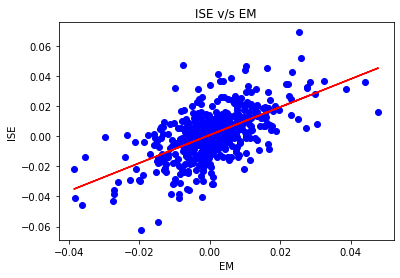

In [24]:
# generate predictions
y_pred = simple_linear_model.predict(x)

# plot the data along with the fitted line
plt.scatter(x, y, color='b')
plt.plot(x, y_pred, color='r')
plt.title('ISE v/s EM')
plt.xlabel('EM')
plt.ylabel('ISE')
plt.show()

In [25]:
# examine the coefficients
print('Coefficients: \n', simple_linear_model.coef_)

Coefficients: 
 [[0.92974236]]


## Multiple Linear Regression

If we want to try to make better predictions by including more than one variable in our model, we can perform Multiple Linear Regression.

The corresponding formula is:
$$y = \alpha + \beta_1 x_1 + ... + \beta_n x_n$$
where $n$ is the total number of variables. Fitting the model now involves determining values for the parameters corresponding to each variable. 

In our example case, we can fit a model that takes into account the London, Berlin and European stock exchange values, and examine the coefficients associated with these exchanges.

In [26]:
all_x = istanbul_stock_exchange[['EM', 'FTSE', 'DAX', 'EU']].values

multi_lm = LinearRegression()
multi_lm.fit(all_x, y)

print('Coefficients: \n', multi_lm.coef_)

Coefficients: 
 [[ 0.41483555 -0.03905489 -0.09836084  0.71979084]]


## Evaluation

To compare our two models, we can use the R-squared score. This score, also called the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variables. In our case, the scores tell us that involving the European stock indices predicts the target variable a bit better.

In [27]:
simple_r2 = simple_linear_model.score(x, y)
multi_r2 = multi_lm.score(all_x, y)

print(simple_r2, multi_r2)

0.36035441895766207 0.46569607654680695
